In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so


In [2]:
df_train = pd.read_csv('train.csv', index_col="id")
df_train.head()

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
id                                                                       
0             525.0               0.0              0.0           186.0   
1             143.0             169.0            143.0           191.0   
2             289.0             134.7              0.0           185.7   
3             304.0              76.0              0.0           228.0   
4             157.0             236.0              0.0           192.0   

    SuperplasticizerComponent  CoarseAggregateComponent  \
id                                                        
0                         0.0                    1125.0   
1                         8.0                     967.0   
2                         0.0                    1075.0   
3                         0.0                     932.0   
4                         0.0                     935.4   

    FineAggregateComponent  AgeInDays  Strength  
id                                               
0                    613.0          3     10.38  
1                    643.0         28     23.52  
2                    795.3         28     36.96  
3                    670.0        365     39.05  
4                    781.2         90     74.19

In [103]:
df_train["AgeInDays"].value_counts()

28     2097
7       796
3       639
90      540
56      313
180     264
14      249
100     212
365      91
270      75
91       73
360      37
120      15
1         5
49        1
Name: AgeInDays, dtype: int64

<AxesSubplot:>

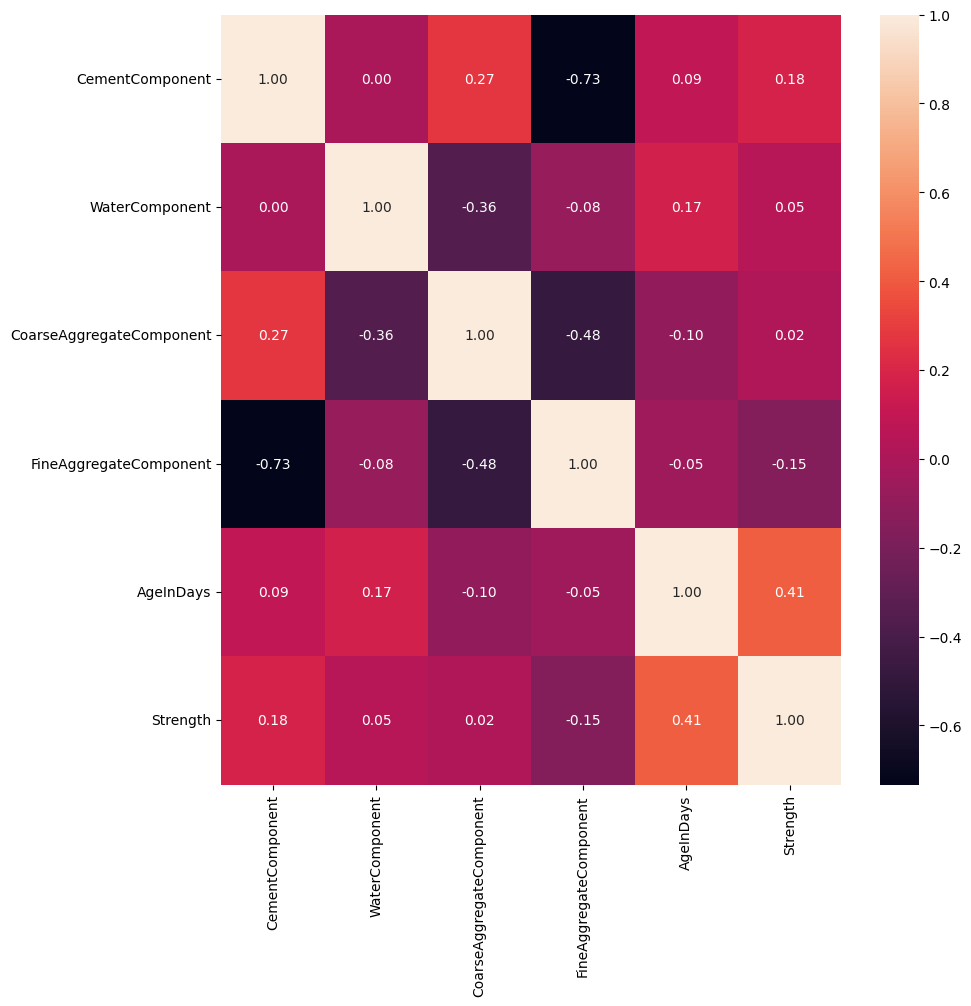

In [125]:
# Plot correlation with heatmap
basic_cols = ['CementComponent', 'WaterComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays', 'Strength']
df_basic = df_train[(df_train["SuperplasticizerComponent"] == 0) & (df_train["BlastFurnaceSlag"] == 0) & (df_train["FlyAshComponent"] == 0)][basic_cols]
# df_basic = df_basic[(df_train["AgeInDays"] == 28)]
corr = df_basic.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt='.2f')

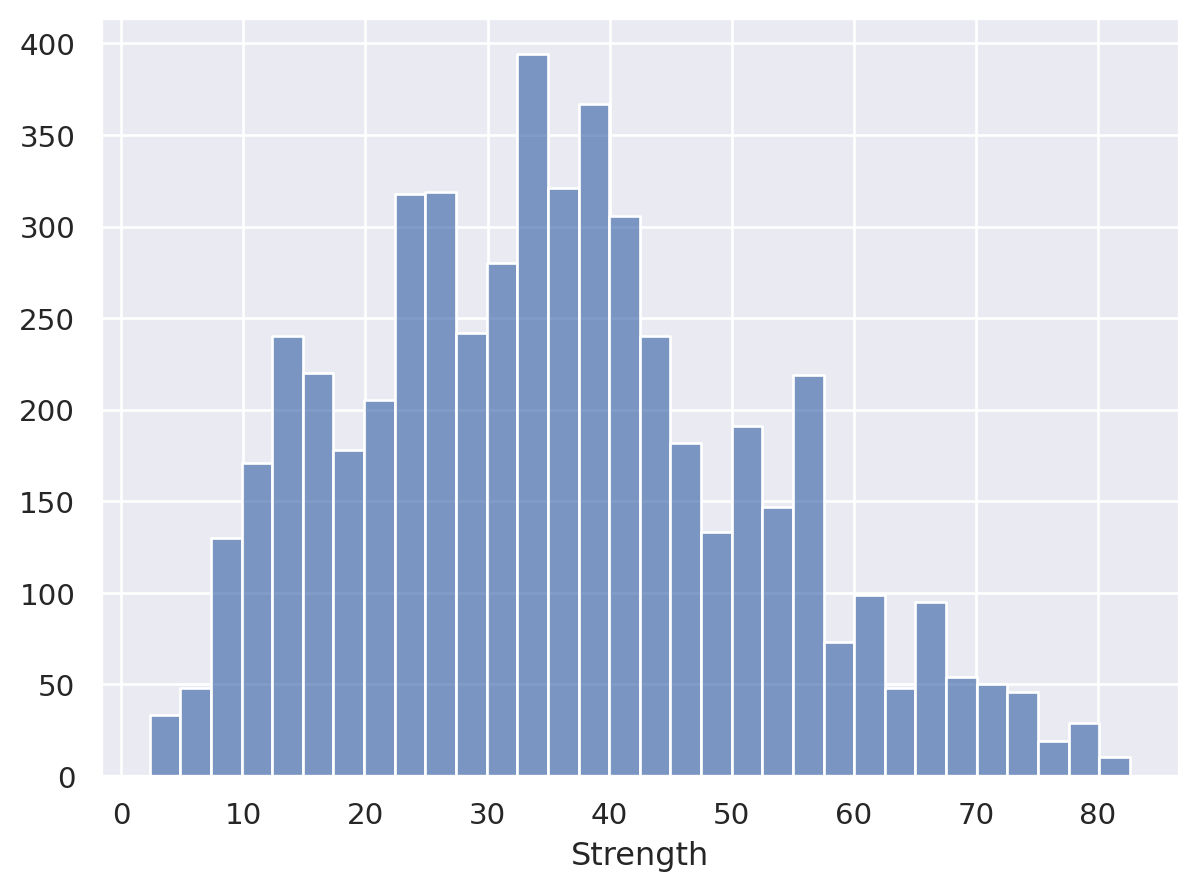

In [4]:
(so.Plot(df_train, x="Strength").add(so.Bars(), so.Hist()))

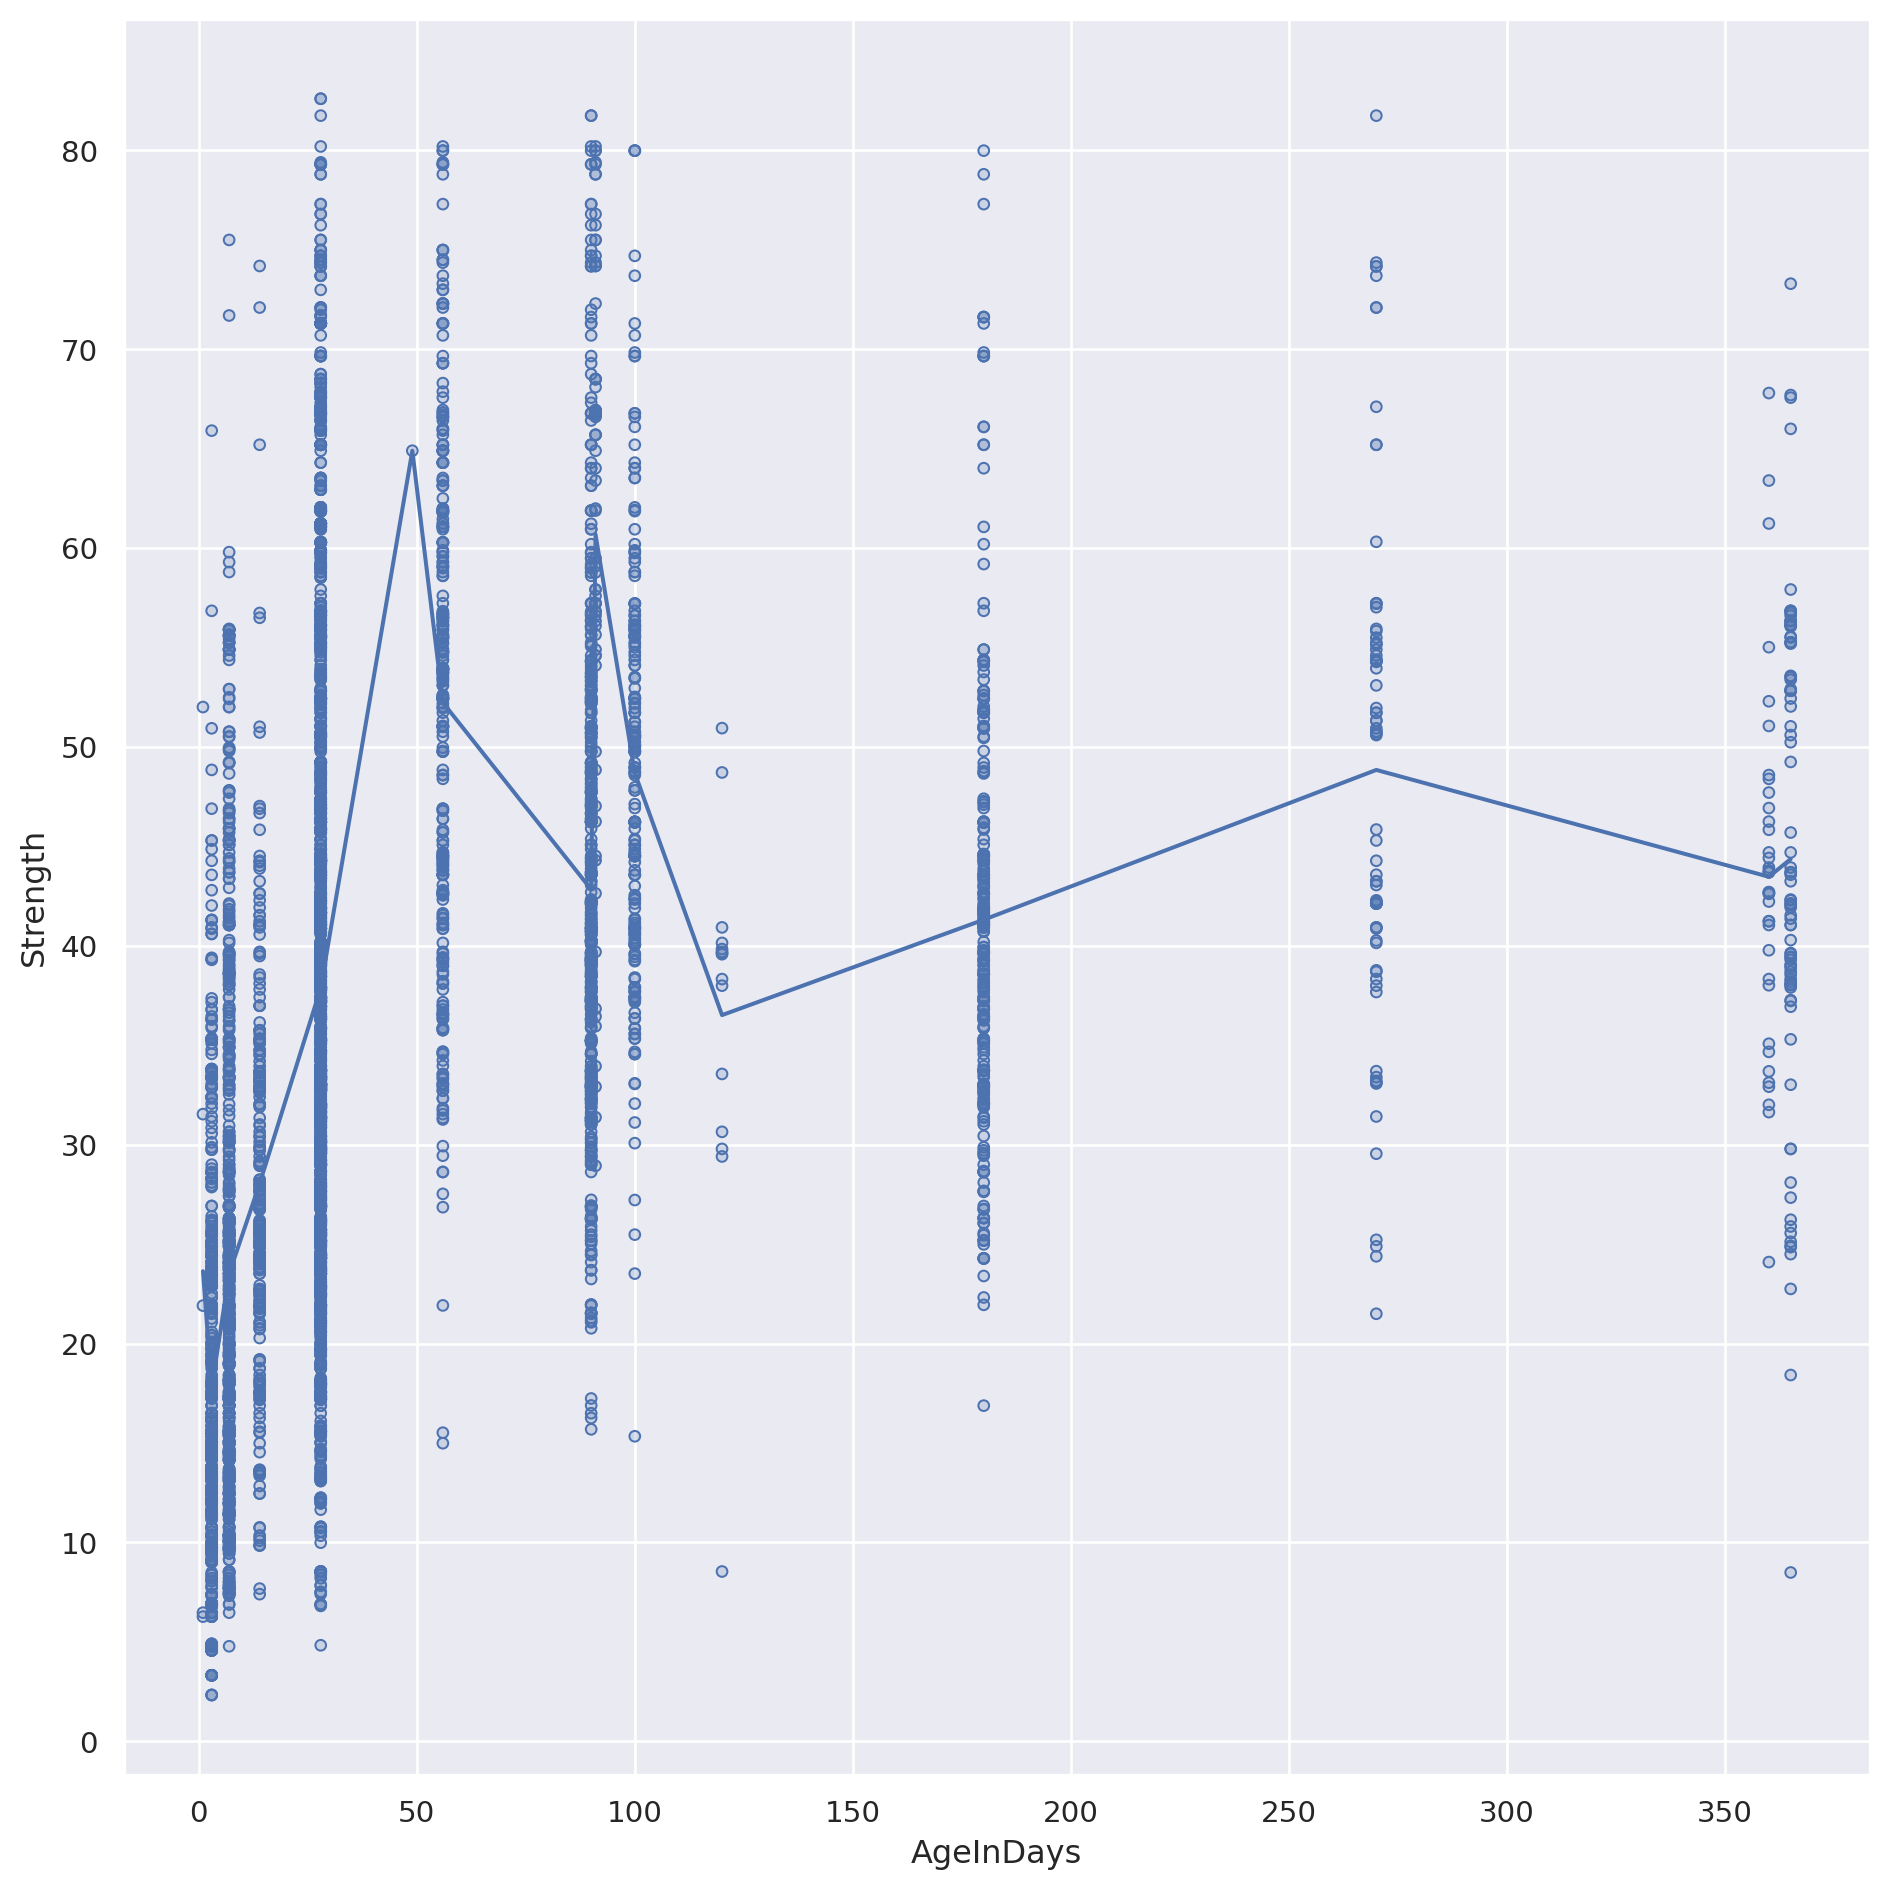

In [6]:
(
    so.Plot(df_train, x="AgeInDays", y="Strength")
    # .facet(col="has_SuperplasticizerComponent", row="has_FlyAshComponent")
    .add(so.Dots())
    .add(so.Line(), so.Agg("mean"))
    .layout(size=(10,10))
)


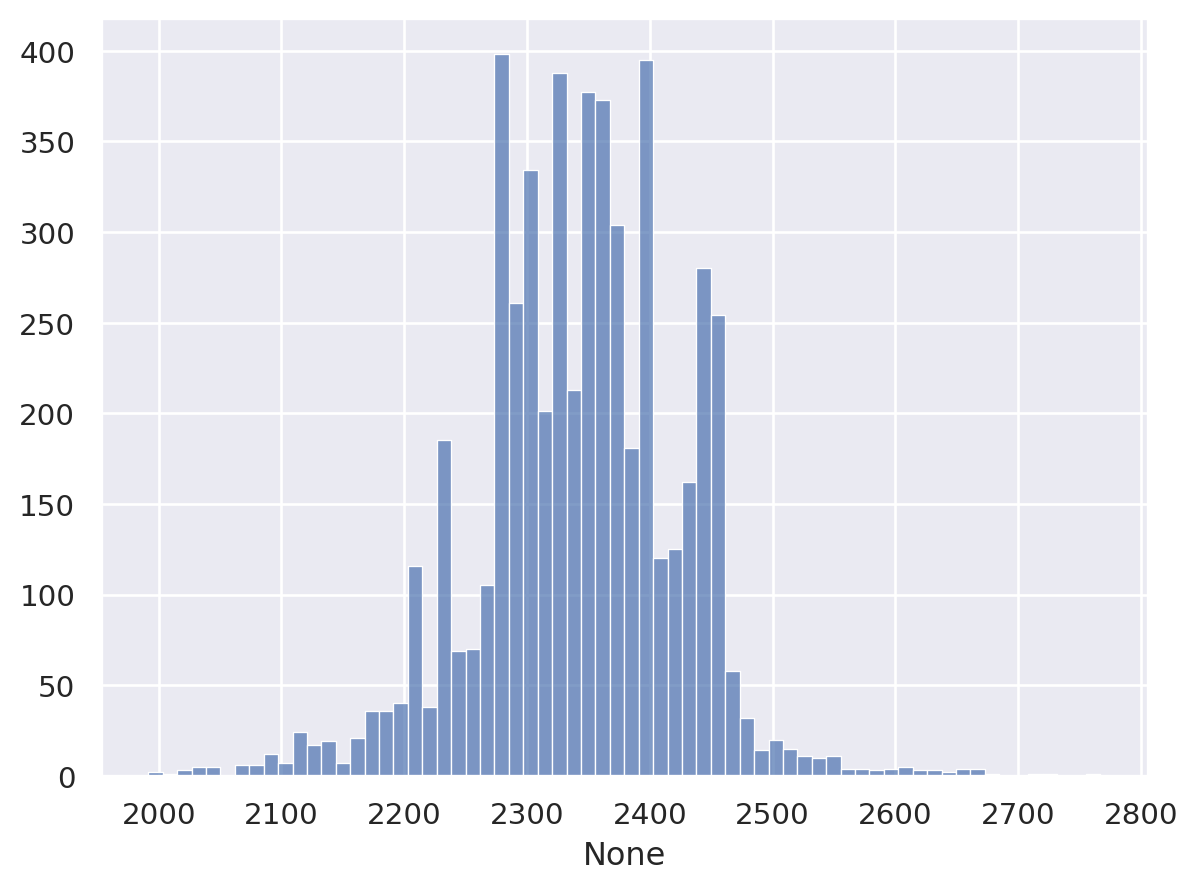

In [7]:
components = ['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent', 'WaterComponent', 'SuperplasticizerComponent', 'CoarseAggregateComponent', 'FineAggregateComponent']
component_sum = sum(df_train[component] for component in components)
component_sum.describe()
(so.Plot(component_sum).add(so.Bars(),so.Hist()))

In [91]:
df_train["ComponentSum"] = sum(df_train[component] for component in components)
df_ratio = df_train[["AgeInDays", "Strength", "ComponentSum"]].copy()
for component in components:
    df_ratio[component] = df_train[component] / df_train["ComponentSum"]
print(df_ratio.describe())
df_ratio

         AgeInDays     Strength  ComponentSum  CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  SuperplasticizerComponent  CoarseAggregateComponent  FineAggregateComponent
count  5407.000000  5407.000000   5407.000000      5407.000000       5407.000000      5407.000000     5407.000000                5407.000000               5407.000000             5407.000000
mean     51.751618    35.452071   2342.056930         0.127221          0.025035         0.013546        0.079241                   0.001735                  0.423650                0.329573
std      70.006975    16.401896     82.990795         0.043036          0.035604         0.023246        0.009470                   0.002385                  0.030333                0.034276
min       1.000000     2.330000   1991.500000         0.043331          0.000000         0.000000        0.047485                   0.000000                  0.319978                0.232373
25%       7.000000    23.640000   2291.600000

AgeInDays  Strength  ComponentSum  CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  SuperplasticizerComponent  CoarseAggregateComponent  FineAggregateComponent
id                                                                                                                                                                                      
0             3     10.38        2449.0         0.214373          0.000000         0.000000        0.075949                   0.000000                  0.459371                0.250306
1            28     23.52        2264.0         0.063163          0.074647         0.063163        0.084364                   0.003534                  0.427120                0.284011
2            28     36.96        2479.7         0.116546          0.054321         0.000000        0.074888                   0.000000                  0.433520                0.320724
3           365     39.05        2210.0         0.137557          0.034389         0.000000        0.103167                   0.000000                  0.421719                0.303167
4            90     74.19        2301.6         0.068213          0.102537         0.000000        0.083420                   0.000000                  0.406413                0.339416
...         ...       ...           ...              ...               ...              ...             ...                        ...                       ...                     ...
5402          3     15.42        2401.6         0.185710          0.009993         0.032895        0.067455                   0.004830                  0.402648                0.296469
5403        180     49.20        2302.0         0.152042          0.000000         0.000000        0.088184                   0.000000                  0.423110                0.336664
5404         28     39.30        2317.0         0.127665          0.000000         0.000000        0.080147                   0.000000                  0.464480                0.327708
5405         28     39.61        2262.2         0.166210          0.041287         0.000000        0.071877                   0.005084                  0.422509                0.293033
5406         56     63.14        2339.5         0.081513          0.000000         0.053516        0.071212                   0.003377                  0.461210                0.329173

[5407 rows x 10 columns]

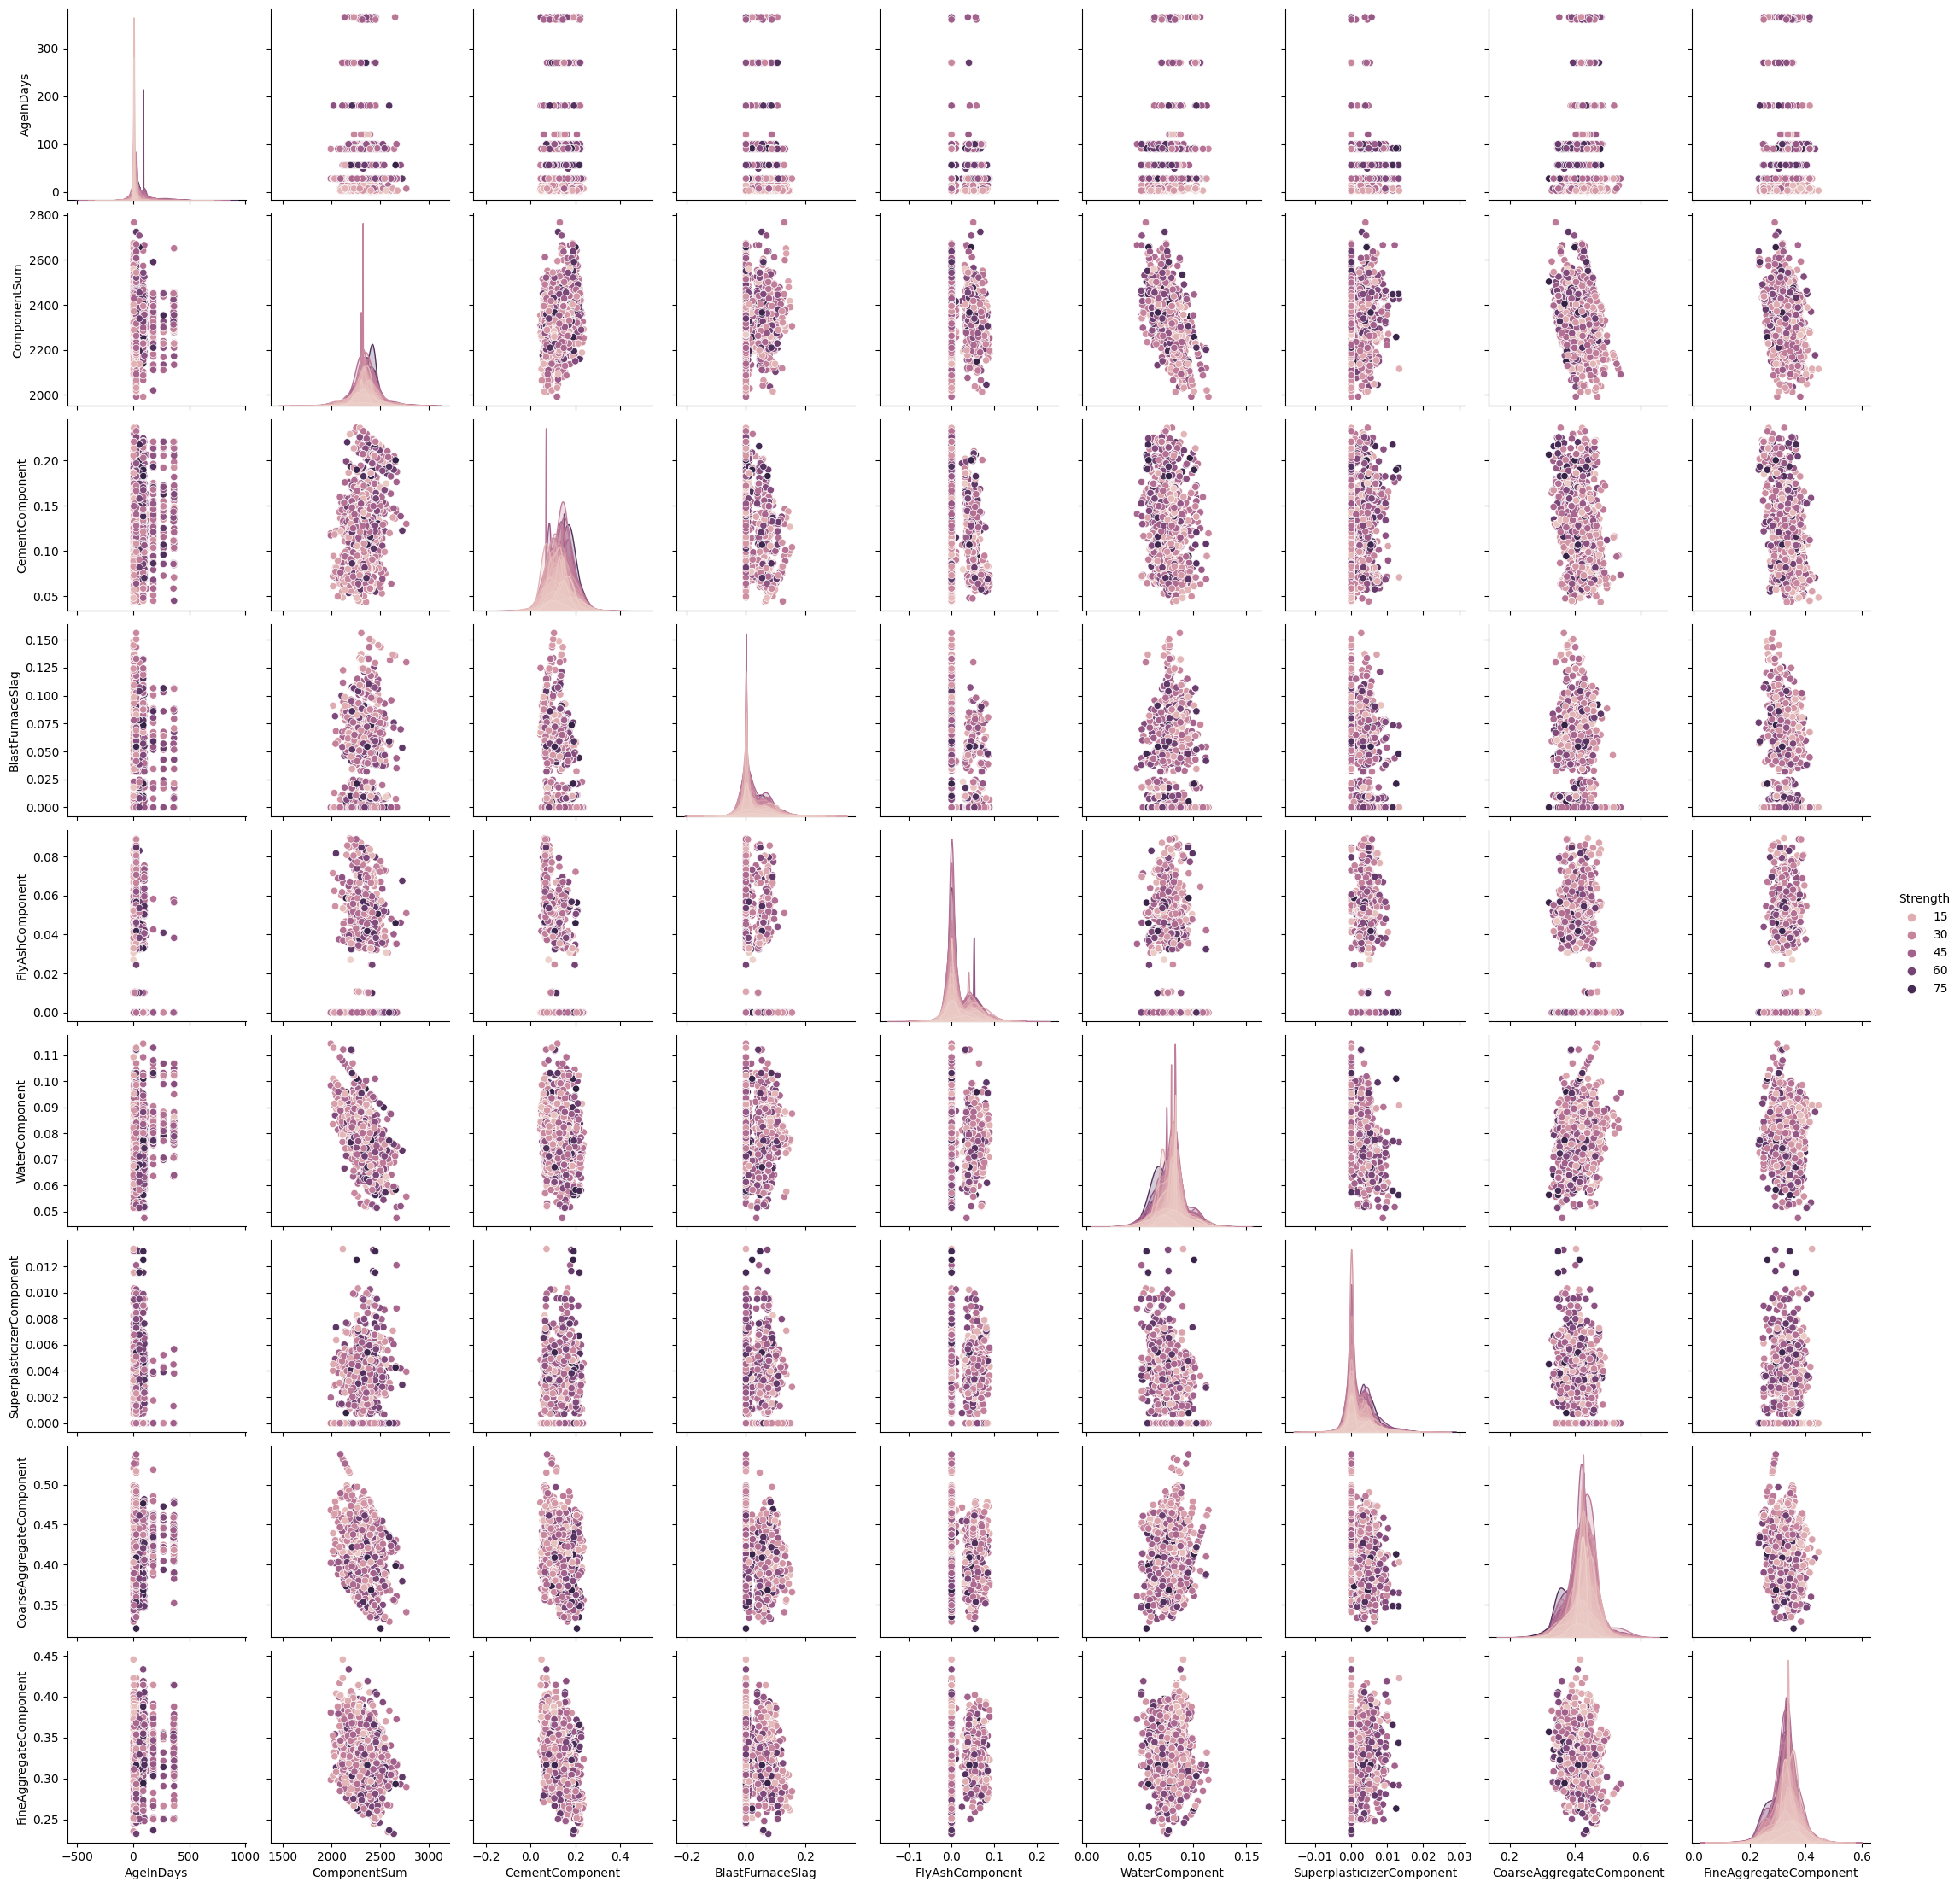

In [95]:
sns.pairplot(df_ratio.reset_index(drop=True), hue="Strength")

In [115]:
df_basic["WaterComponent"].value_counts()

192.0    182
185.7    122
186.0    102
185.0     92
200.0     37
203.0     26
193.0     18
214.6     17
189.0     16
173.0     16
191.0     15
184.0     10
197.0     10
228.0      9
182.0      8
146.0      8
181.0      7
180.0      7
198.0      4
203.5      3
194.0      3
183.0      2
198.6      2
180.3      2
186.7      2
175.0      2
187.0      2
178.0      1
159.0      1
171.5      1
162.0      1
144.7      1
183.9      1
210.0      1
186.4      1
196.0      1
190.0      1
203.2      1
195.0      1
Name: WaterComponent, dtype: int64

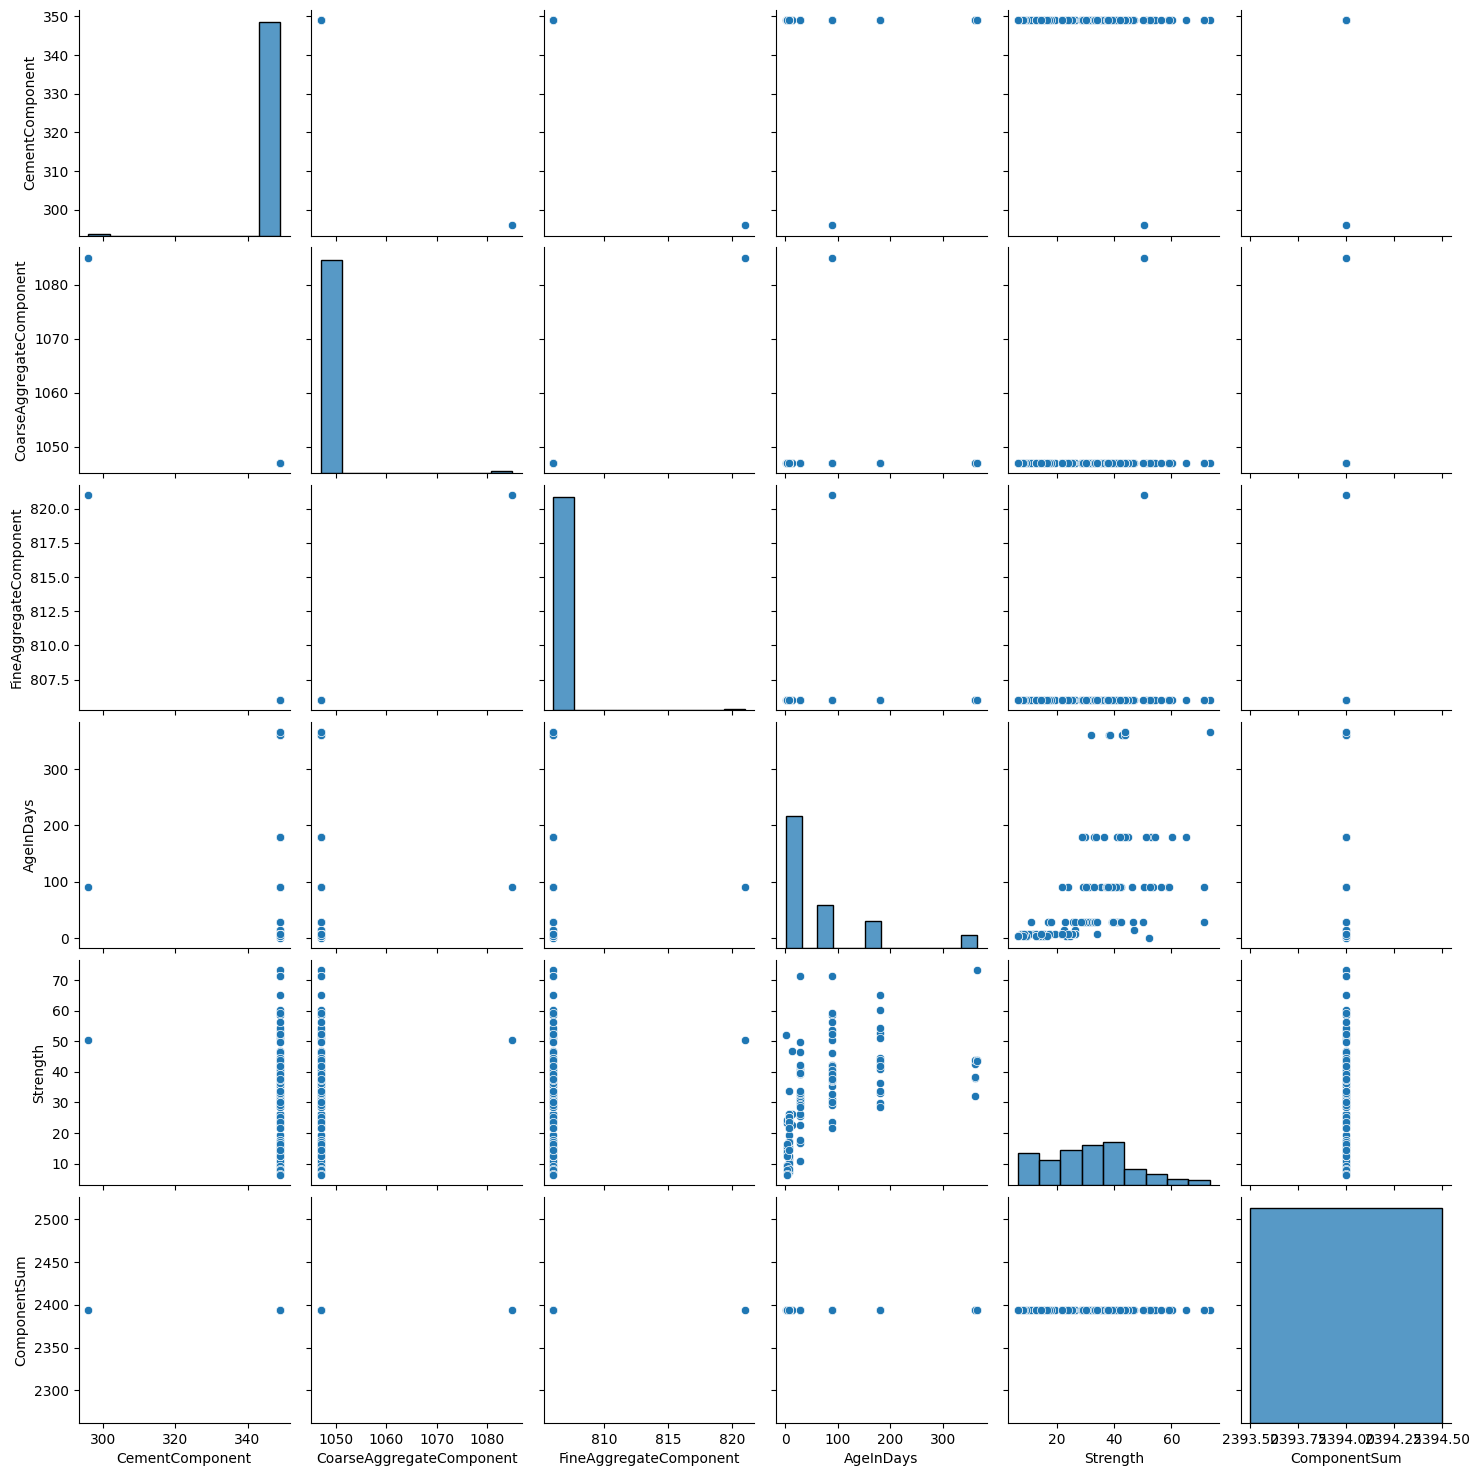

In [133]:
# sns.pairplot(df_train[components + ["AgeInDays", "Strength"]])
df = df_basic
# df = df[df["AgeInDays"] == 28].drop(columns=["AgeInDays"])
df["ComponentSum"] = sum(df[c] for c in ("CementComponent", "CoarseAggregateComponent", "FineAggregateComponent", "WaterComponent"))
df = df[df["WaterComponent"] == 192.0].drop(columns=["WaterComponent"])
df = df[df["ComponentSum"].isin(df["ComponentSum"].value_counts().head(1).index)]
sns.pairplot(df)

In [9]:
optional_components = ['BlastFurnaceSlag', 'FlyAshComponent', 'SuperplasticizerComponent']

for component in optional_components:
    df_train["has_" + component] = df_train[component] > 0


In [10]:
df_train.sort_values(by="Strength", ascending=False).head(20)

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
id                                                                         
3623            313.3               0.0            113.0           179.6   
1760            475.0               0.0              0.0           228.0   
4469            427.5              47.5              0.0           228.0   
4065            540.0               0.0              0.0           173.0   
269             238.1               0.0              0.0           185.7   
2039            139.6             209.4              0.0           192.0   
1193            339.0               0.0              0.0           197.0   
5323            439.0             177.0              0.0           186.0   
4368            202.0              11.0            126.0           206.0   
5134            252.5               0.0              0.0           185.7   
3136            480.0               0.0              0.0           192.0   
4288            446.0              24.0             79.0           162.0   
4959            531.3               0.0            121.9           154.8   
2834            446.0              24.0             79.0           162.0   
2780            362.6             189.0              0.0           164.9   
4573            233.8               0.0             94.6           197.9   
1329            251.4               0.0            118.3           192.9   
4417            178.0             129.9            118.6           175.5   
1257            540.0               0.0              0.0           173.0   
4868            385.0               0.0              0.0           186.0   

      SuperplasticizerComponent  CoarseAggregateComponent  \
id                                                          
3623                        8.9                    1001.9   
1760                        0.0                     932.0   
4469                        0.0                     932.0   
4065                        0.0                    1125.0   
269                         0.0                    1118.8   
2039                        0.0                    1047.0   
1193                        0.0                     968.0   
5323                       11.1                     884.9   
4368                        1.7                     801.0   
5134                        0.0                    1111.6   
3136                        0.0                     936.0   
4288                       11.6                     967.0   
4959                       11.3                    1058.6   
2834                       11.6                     967.0   
2780                       11.6                     944.7   
4573                        4.6                     947.0   
1329                        5.8                    1043.6   
4417                        3.6                    1007.3   
1257                        0.0                    1125.0   
4868                        0.0                     966.0   

      FineAggregateComponent  AgeInDays  Strength  has_BlastFurnaceSlag  \
id                                                                        
3623                   688.7         28     82.60                 False   
1760                   713.2         28     82.60                 False   
4469                   594.0         90     81.75                  True   
4065                   613.0        270     81.75                 False   
269                    789.3         28     81.75                 False   
2039                   806.9         90     81.75                  True   
1193                   783.0         56     80.20                 False   
5323                   707.9         91     80.20                  True   
4368                   801.0         28     80.20                  True   
5134                   784.3         90     80.20                 False   
3136                   721.0         90     79.99                 False   
4288           

In [142]:
pd.set_option("display.width", 1000)

groups = basic_cols[:-2]
df_grouped = df_basic.groupby(groups).filter(lambda x: len(x) > 20)
df_grouped["group"] = df_grouped.groupby(groups).ngroup()

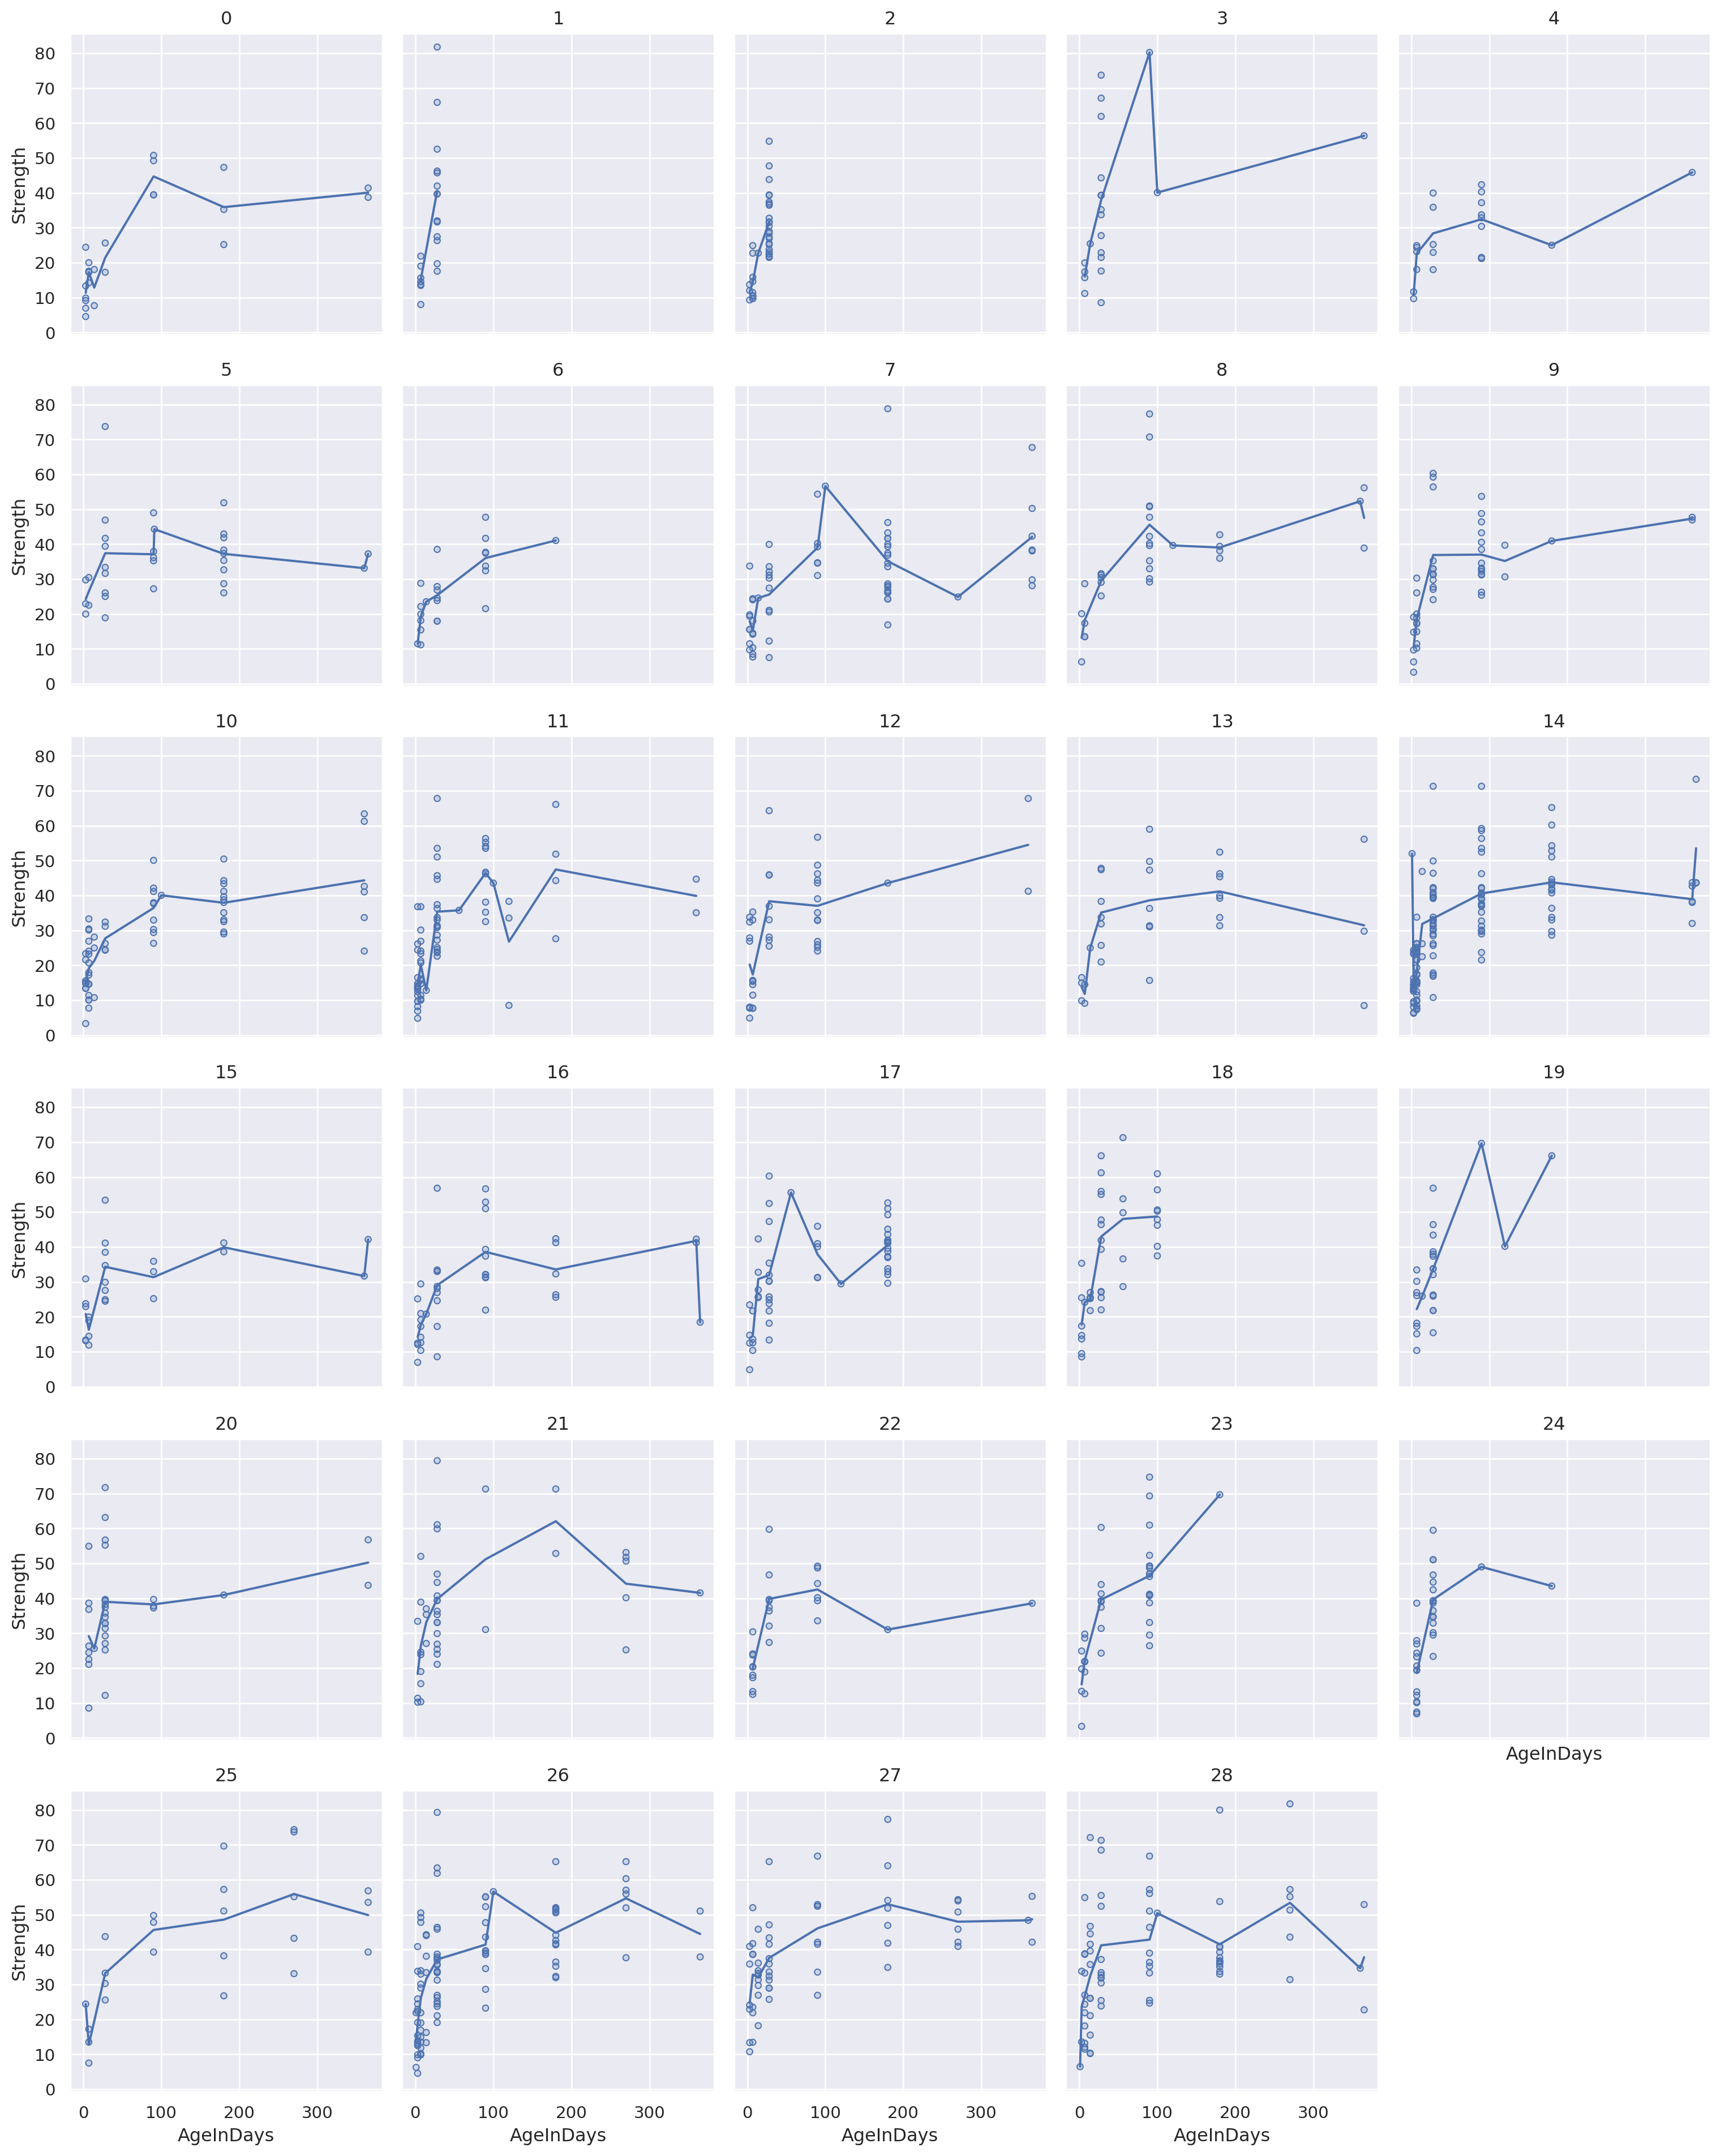

In [190]:
(
    so.Plot(df_grouped, x="AgeInDays", y="Strength")
    .facet("group", wrap=5)
    .add(so.Dots())
    .add(so.Line(), so.Agg("mean"))
    # .scale(x="log")
    .layout(size=(16,20))
)

In [158]:
from sklearn.preprocessing import StandardScaler
strength_scaler = StandardScaler()
strength_scaler.fit(df_train["Strength"].values.reshape(-1, 1))

StandardScaler()

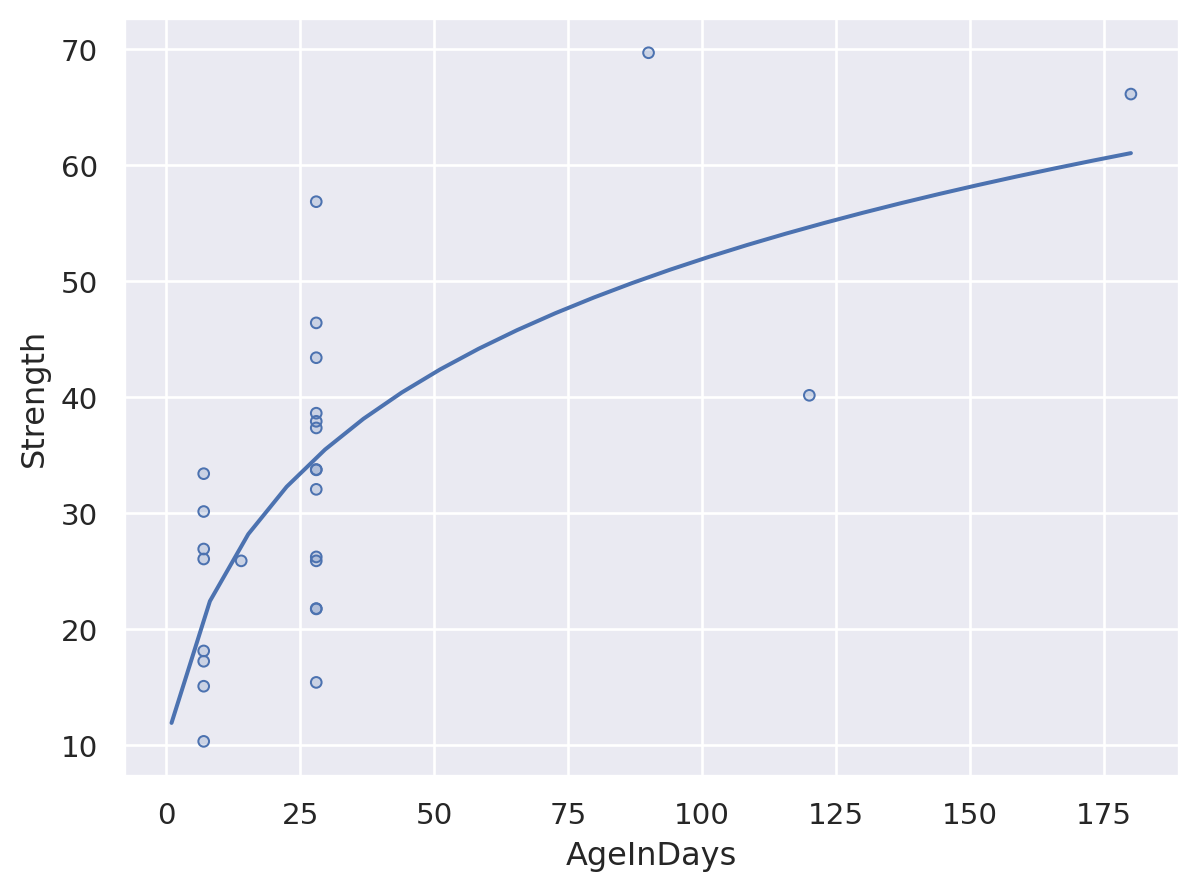

In [211]:
from sklearn.kernel_ridge import KernelRidge

df = df_grouped[df_grouped["group"] == 19]

kernel_ridge = KernelRidge(kernel="rbf", gamma=5e-3, alpha=0.001)


def fit_kernel_ridge(df):
    X = np.log(df["AgeInDays"].values).reshape(-1, 1)
    y = strength_scaler.transform(df["Strength"].values.reshape(-1, 1)).reshape(-1)
    return kernel_ridge.fit(X, y)


def predict_kernel_ridge(ages, kr_fit):
    X = np.log(ages).reshape(-1, 1)
    return strength_scaler.inverse_transform(kr_fit.predict(X).reshape(-1, 1)).reshape(
        -1
    )


log_age = np.log(df["AgeInDays"].values)
X_pred = np.linspace(1, df["AgeInDays"].max(), len(df))
y_pred = predict_kernel_ridge(X_pred, fit_kernel_ridge(df))

# Plot the results
(so.Plot(df, x="AgeInDays", y="Strength").add(so.Dots()).add(so.Line(), x=X_pred, y=y_pred))


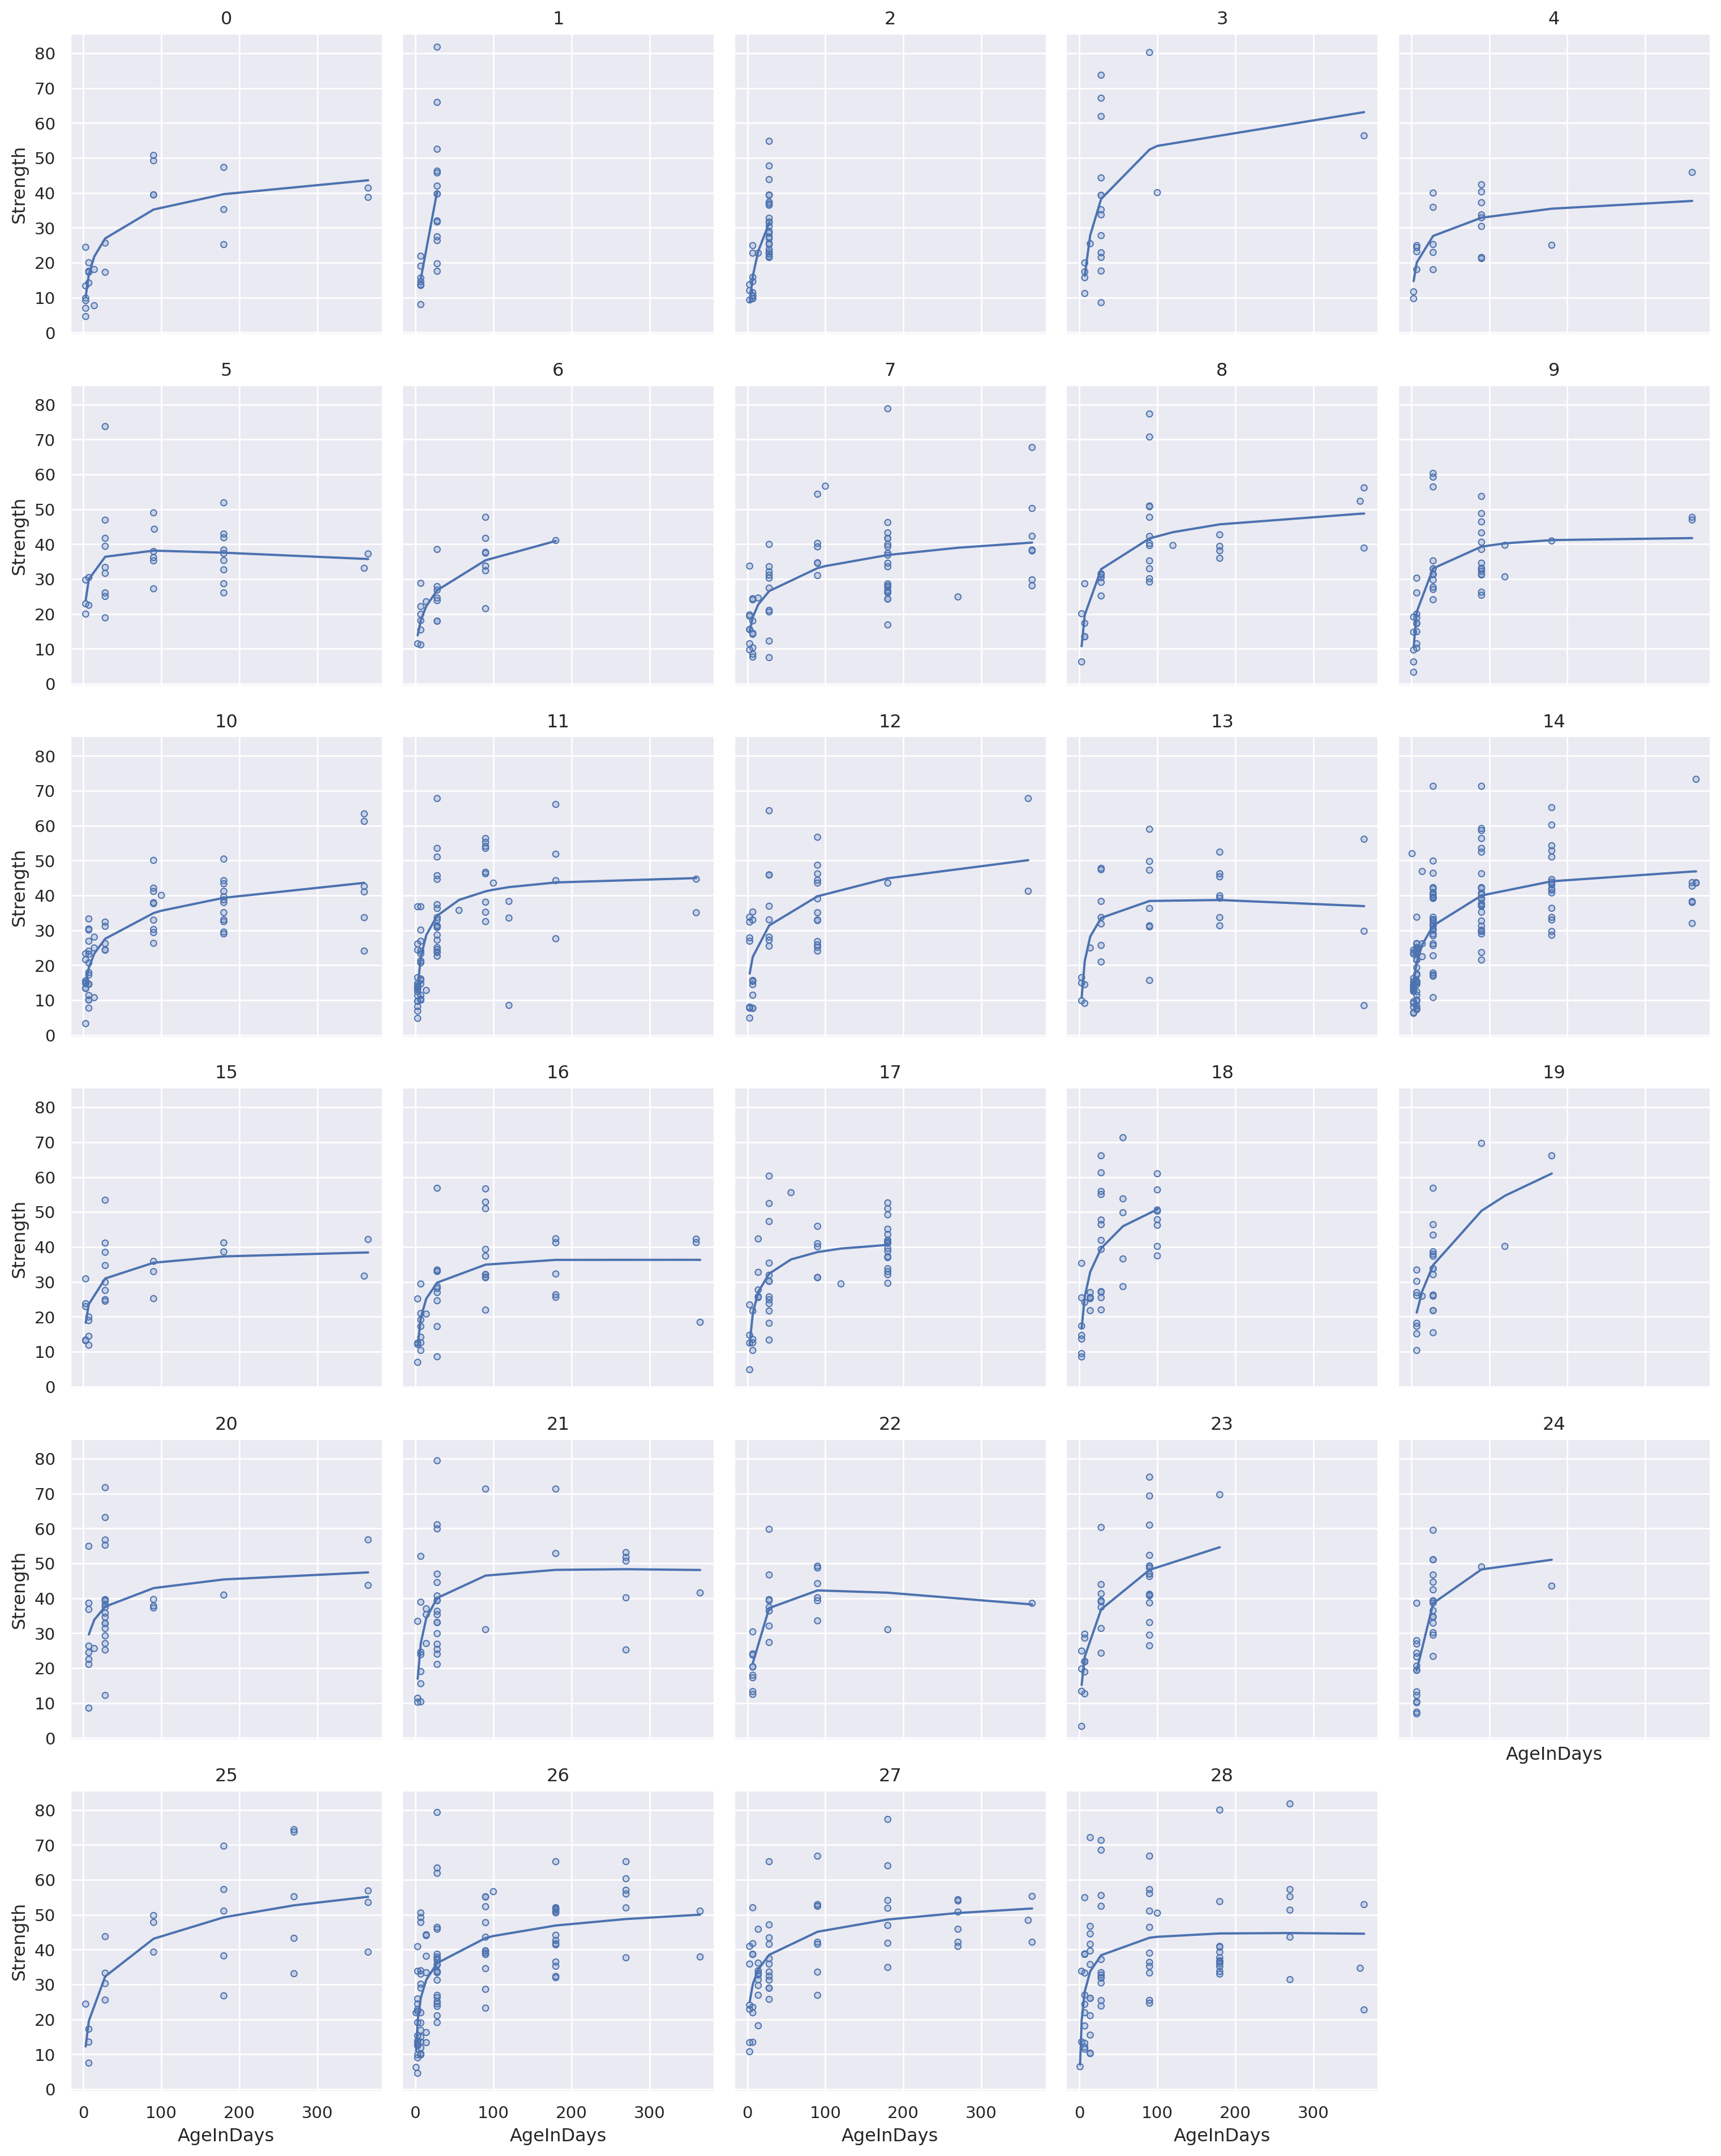

In [214]:
df = df_grouped

def kernel_ridge_transform(df):
    kr = fit_kernel_ridge(df)
    return pd.DataFrame({"Prediction": predict_kernel_ridge(df["AgeInDays"].to_numpy(), kr)}, index=df.index)

df["Prediction"] = df.groupby(groups).apply(kernel_ridge_transform)

(
    so.Plot(df, x="AgeInDays", y="Strength")
    .facet("group", wrap=5)
    .add(so.Dots())
    .add(so.Line(), y="Prediction")
    # .scale(x="log")
    .layout(size=(16,20))
)

In [82]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["scaled_Strength"] = scaler.fit_transform(df["Strength"].values.reshape(-1, 1))


kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(
    kernel=kernel, n_restarts_optimizer=20, normalize_y=True
)


def gp_fit_transform(group_df):
    age_in_days = group_df["AgeInDays"].to_numpy().reshape(-1, 1)
    gaussian_process.fit(age_in_days, group_df["Strength"])
    results = gaussian_process.predict(age_in_days)
    # results = np.arange(len(group_df))

    # plot = (
    #     so.Plot(group_df, x="AgeInDays", y=results)
    #     .add(so.Line())
    #     .add(so.Dot(marker="x"), y="Strength")
    # )

    return pd.DataFrame({"gp_prediction": results}, index=group_df.index)


df["gp_prediction"] = df.groupby(components).apply(gp_fit_transform)
# results, plot = gp_fit_transform(df[df["group"] == 0])


/home/james/.pyenv/versions/3.7.16/envs/kaggle3.7/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/james/.pyenv/versions/3.7.16/envs/kaggle3.7/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/home/james/.pyenv/versions/3.7.16/envs/kaggle3.7/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the

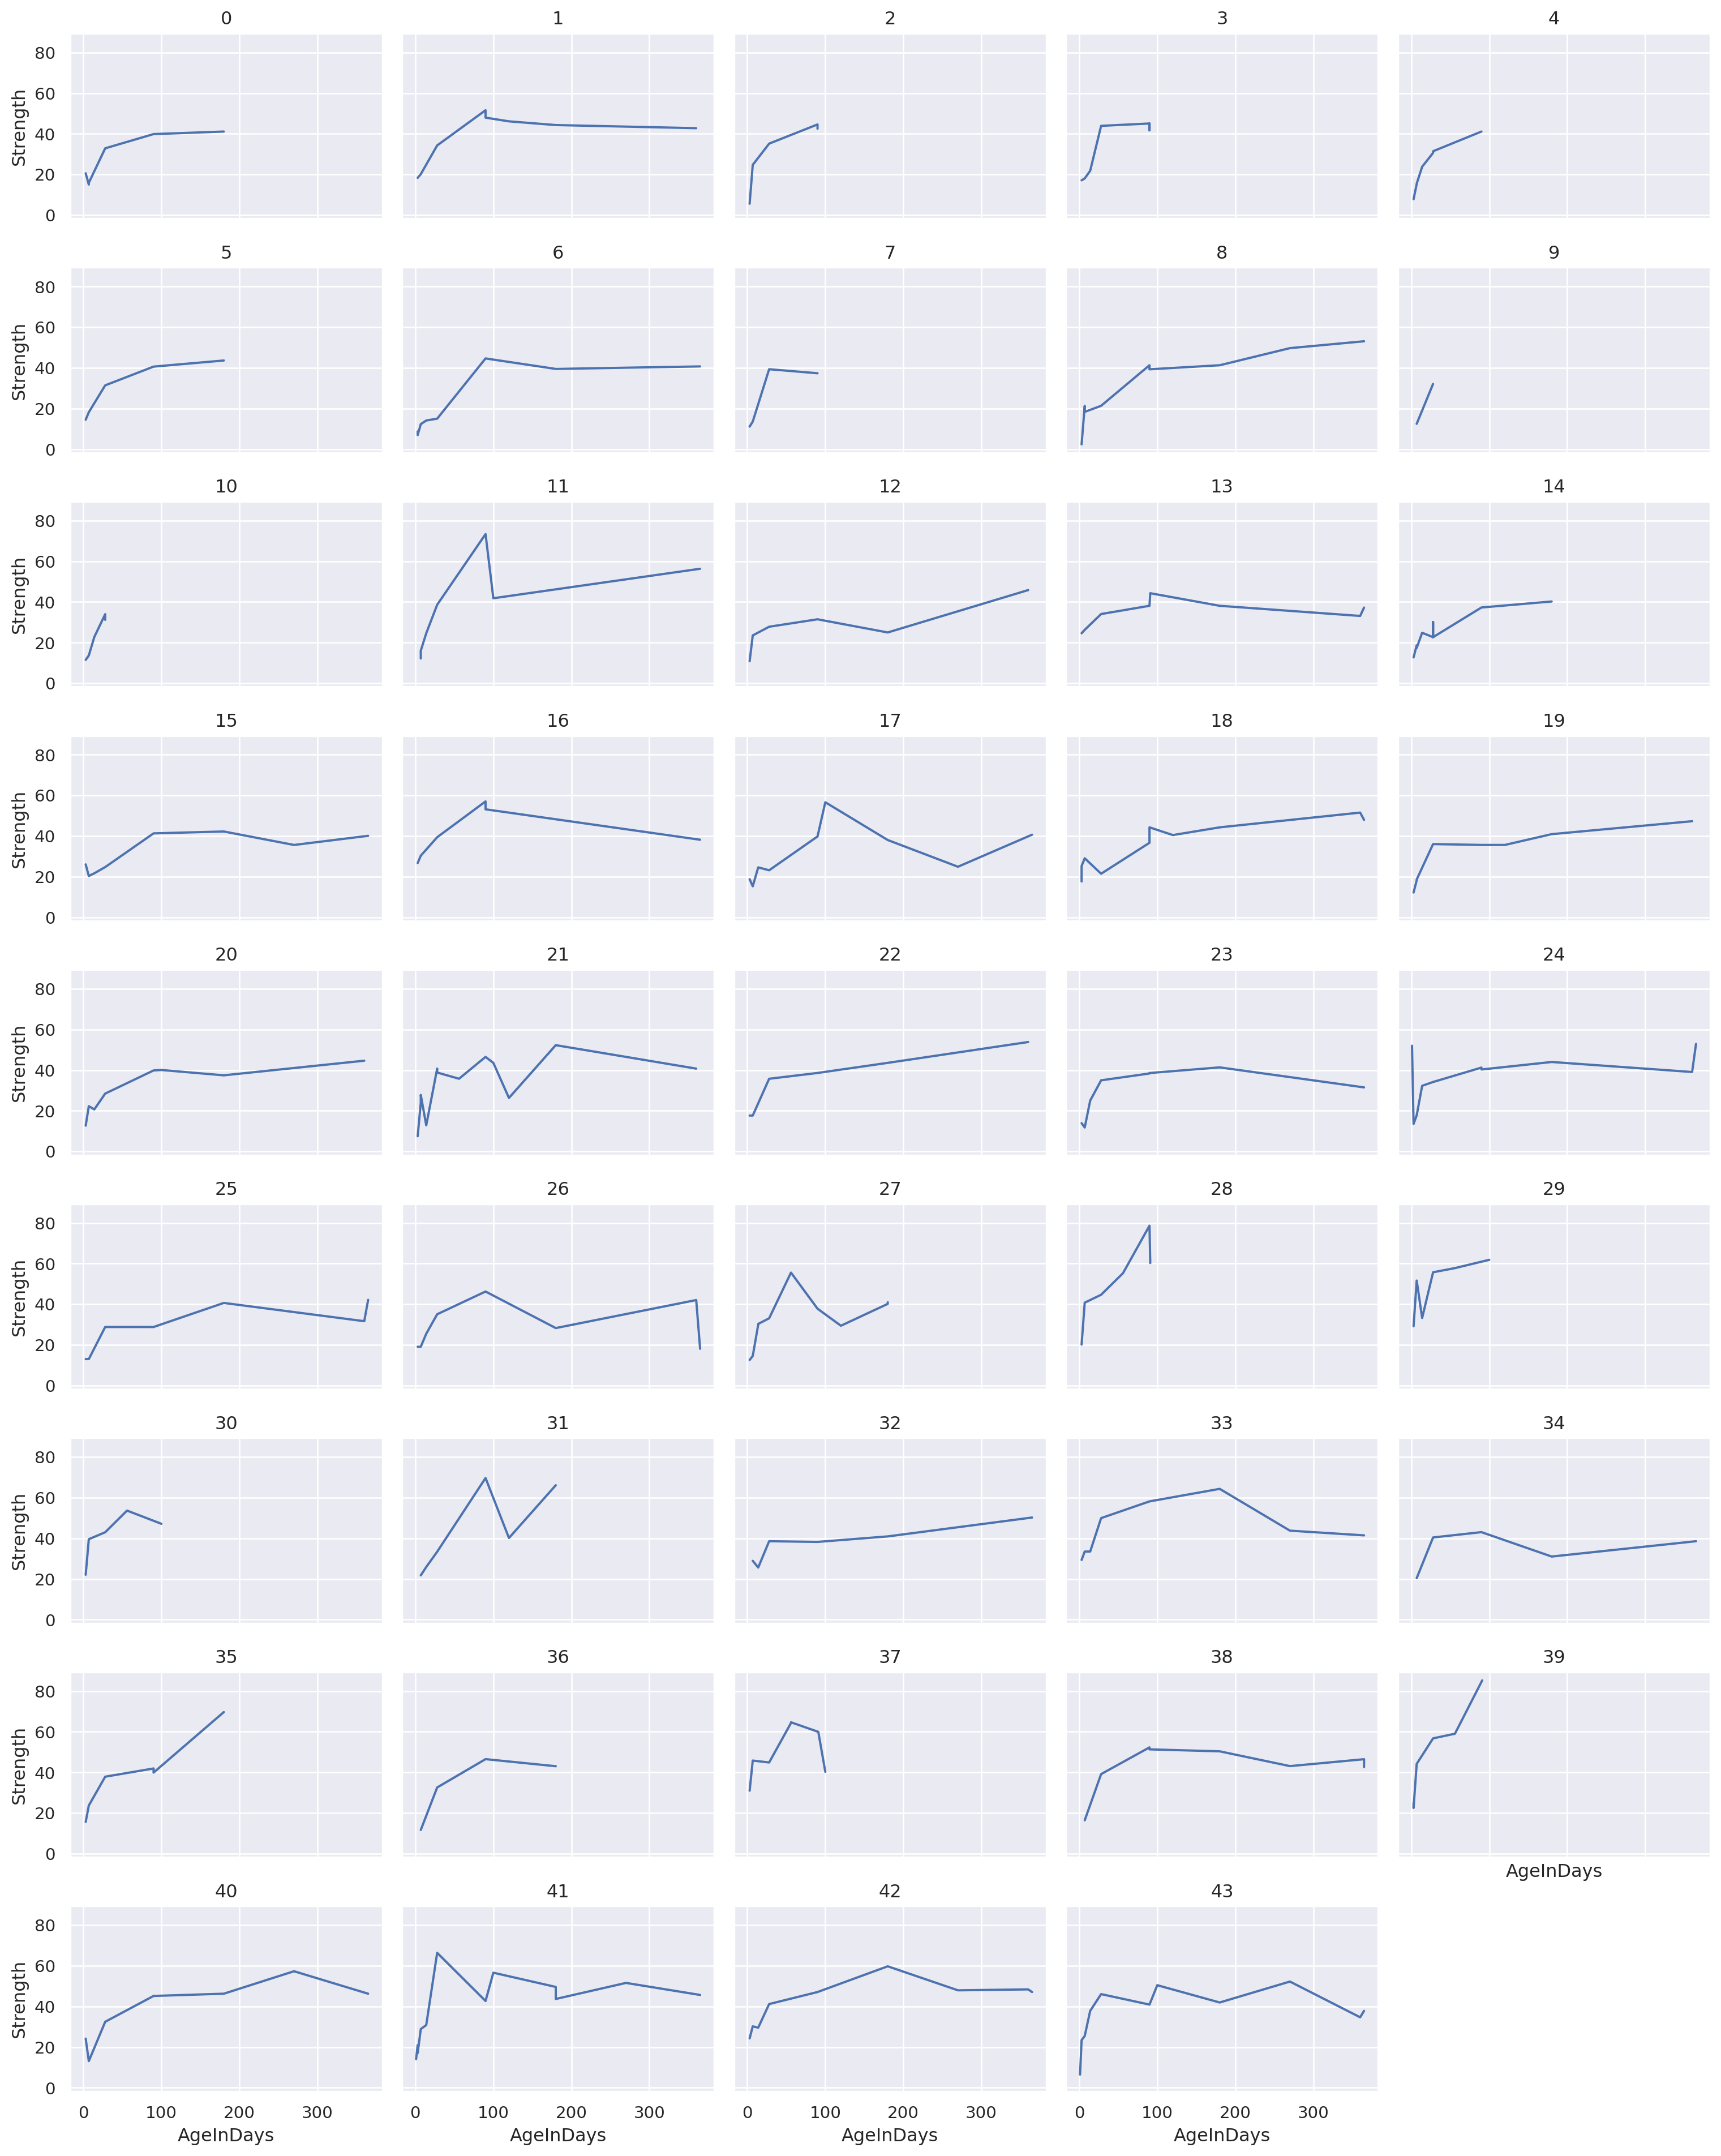

In [85]:
(
    so.Plot(df, x="AgeInDays", y="Strength")
    .facet("group", wrap=5)
    .add(so.Line(), y="gp_prediction")
    # .add(so.Dots())
    # .scale(y="log")
    .layout(size=(16,20))
)